# 📑 Create SQL Databases
### Links
- [SQL DataTypes](https://www.journaldev.com/16774/sql-data-types)




In [2]:
import sqlite3,os; import pandas as pd
import numpy as np,sympy as sp,pylab as pl
from IPython.core.display import display, HTML
from IPython.core.magic import register_line_magic
@register_line_magic
def get_query(q):
    sp.pprint(r'SQL Queries')
    tr=[]; cursor.execute(q)
    result=cursor.fetchall()
    for r in result: 
        tr+=[r]
    display(pd.DataFrame.from_records(tr)\
              .style.set_table_styles(style_dict))
def connect_to_db(dbf):
    sqlconn=None
    try:
        sqlconn=sqlite3.connect(dbf)
        return sqlconn
    except Error as err:
        print(err)
        if sqlconn is not None:
            sqlconn.close()
connection=connect_to_db('example.db')
if connection is not None:
    cursor=connection.cursor()
os.listdir()

['.config', 'example.db', 'sample_data']

In [0]:
thp=[('font-size','15px'),('text-align','center'),
     ('font-weight','bold'),('padding','5px 5px'),
     ('color','white'),('background-color','slategray')]
tdp=[('font-size','14px'),('padding','5px 5px'),
     ('text-align','center'),('color','darkblue'),
     ('background-color','silver')]
style_dict=[dict(selector='th',props=thp),
            dict(selector='td',props=tdp)]
            

# 📑 Create SQL Tables

In [4]:
# from json 
fpath='https://data.cityofnewyork.us/resource/'
se=pd.read_json(fpath+'h7rb-945c.json')
fl=['dbn','total_students',
    'graduation_rate','attendance_rate',
    'latitude','longitude',
    'city','council_district']
se=se[fl].dropna().astype({'council_district':'int'})
se.to_sql('schooledu',con=connection,if_exists='replace')
se.head(int(10)).style\
  .set_table_styles(style_dict)

,dbn,total_students,graduation_rate,attendance_rate,latitude,longitude,city,council_district
0,08X519,242,0.49,0.81,40.8205,-73.8812,Bronx,17
1,13K350,268,0.83,0.81,40.6973,-73.9845,Brooklyn,33
2,28Q680,704,0.97,0.96,40.718,-73.8059,Jamaica,24
3,08X282,305,0.6,0.79,40.815,-73.8561,Bronx,18
4,25Q285,566,0.94,0.93,40.7649,-73.7894,Flushing,19
5,13K499,262,0.7,0.79,40.6786,-73.9616,Brooklyn,35
6,27Q351,370,0.63,0.84,40.586,-73.8253,Rockaway Park,32
7,02M316,275,0.69,0.8,40.7057,-74.0133,Manhattan,1
8,11X249,322,0.89,0.93,40.874,-73.8317,Bronx,12
9,02M529,641,0.65,0.83,40.7576,-73.9835,Manhattan,4


In [5]:
# from csv
url='https://raw.githubusercontent.com/plotly/'+\
    'datasets/master/2016-weather-data-seattle.csv'
weather=pd.read_csv(url).dropna()
weather=weather.astype({'Mean_TemperatureC':'int64',
                        'Min_TemperatureC':'int64'})
weather.to_sql('weather',con=connection,
               if_exists='replace')
weather.describe().style\
       .set_table_styles(style_dict)

,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC
count,24376,24376,24376
mean,14.9438,11.0435,7.25103
std,7.17252,5.79416,4.91293
min,-18,-12,-17
25%,9,7,4
50%,14,11,7
75%,20,16,11
max,54,31,22


In [6]:
# from csv
url='https://raw.githubusercontent.com/'+\
    'OlgaBelitskaya/machine_learning_engineer_nd009/'+\
    'master/Machine_Learning_Engineer_ND_P3/customers.csv'
customers=pd.read_csv(url).dropna()
customers.to_sql('customers',con=connection,
                 if_exists='replace')
customers.head(int(7)).style\
         .set_table_styles(style_dict)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545


In [7]:
# from csv
url='https://raw.githubusercontent.com/'+\
    'OlgaBelitskaya/machine_learning_engineer_nd009/'+\
    'master/Machine_Learning_Engineer_ND_P6/macro.csv'
macro=pd.read_csv(url)
fl=['timestamp','oil_urals','brent','cpi','ppi',
    'usdrub','eurrub','salary','salary_growth',
    'unemployment','employment','average_life_exp',
    'pop_natural_increase','childbirth']
macro=macro[fl].dropna()
macro.to_sql('macro',con=connection,
             if_exists='replace')
macro.tail(int(7)).T.style\
     .set_table_styles(style_dict)

,2184,2185,2186,2187,2188,2189,2190
timestamp,2015-12-25,2015-12-26,2015-12-27,2015-12-28,2015-12-29,2015-12-30,2015-12-31
oil_urals,36.7805,36.7805,36.7805,36.7805,36.7805,36.7805,36.7805
brent,37.89,37.89,37.89,36.62,37.79,36.46,37.28
cpi,506.4,506.4,506.4,506.4,506.4,506.4,506.4
ppi,581.6,581.6,581.6,581.6,581.6,581.6,581.6
usdrub,70.6396,70.6396,70.6396,72.0838,72.2141,73.4343,72.851
eurrub,77.1132,77.1132,77.1132,79.1101,78.9353,80.1153,79.3106
salary,64310,64310,64310,64310,64310,64310,64310
salary_growth,0.0506796,0.0506796,0.0506796,0.0506796,0.0506796,0.0506796,0.0506796
unemployment,0.0177083,0.0177083,0.0177083,0.0177083,0.0177083,0.0177083,0.0177083


In [8]:
# from csv
url='https://raw.githubusercontent.com/'+\
    'OlgaBelitskaya/machine_learning_engineer_nd009/'+\
    'master/Machine_Learning_Engineer_ND_P6/train.csv'
housing=pd.read_csv(url)
fnum=['timestamp','full_sq','floor','max_floor','num_room',
      'area_m','kremlin_km','big_road2_km','big_road1_km',
      'workplaces_km','stadium_km','swim_pool_km','fitness_km',
      'detention_facility_km','cemetery_km','radiation_km',
      'oil_chemistry_km','theater_km','exhibition_km','museum_km',
      'park_km','public_healthcare_km','metro_min_walk',
      'metro_km_avto', 'bus_terminal_avto_km',
      'public_transport_station_min_walk',
      'railroad_station_walk_min','railroad_station_avto_km',
      'kindergarten_km','school_km','preschool_km',
      'university_km','additional_education_km',
      'shopping_centers_km','big_market_km','ekder_all',
      'work_all','young_all']
fcat=['sub_area','ID_metro','office_raion',
      'raion_popul','healthcare_centers_raion',
      'school_education_centers_raion','sport_objects_raion',
      'preschool_education_centers_raion']
housing=housing[fnum+fcat].dropna()
housing.to_sql('housing',con=connection,
               if_exists='replace')
housing.tail(int(7)).T.style\
       .set_table_styles(style_dict)

,30464,30465,30466,30467,30468,30469,30470
timestamp,2015-06-30,2015-06-30,2015-06-30,2015-06-30,2015-06-30,2015-06-30,2015-06-30
full_sq,56,52,44,86,45,64,43
floor,19,13,7,3,10,5,1
max_floor,19,17,9,9,20,15,9
num_room,2,2,2,4,1,2,2
area_m,4.4413e+06,7.30741e+06,1.00531e+07,7.30741e+06,2.55363e+07,6.05006e+06,4.39533e+06
kremlin_km,10.5145,0.0728966,12.5993,3.26928,21.9058,13.6226,11.8126
big_road2_km,2.42069,4.2734,3.76241,1.2457,3.68841,2.174,2.08923
big_road1_km,1.90825,4.08128,3.09606,1.23873,2.80808,0.960608,1.92088
workplaces_km,1.76668,1.09151,1.44258,0.796851,9.47909,2.34043,3.0651


In [9]:
# from csv
url='https://raw.githubusercontent.com/noahgift/'+\
    'mma/master/data/ufc_fights_all.csv'
mma=pd.read_csv(url).dropna()
mma.to_sql('mma',con=connection,
           if_exists='replace')
mma.tail(int(2)).T.style\
   .set_table_styles(style_dict)

,3567,3568
pageurl,/events/UFC-Fight-Night-83-Cerrone-vs-Oliveira-47935,/events/UFC-Fight-Night-83-Cerrone-vs-Oliveira-47935
eid,47935,47935
mid,2,1
event_name,UFC Fight Night 83 - Cerrone vs. Oliveira,UFC Fight Night 83 - Cerrone vs. Oliveira
event_org,Ultimate Fighting Championship,Ultimate Fighting Championship
event_date,2/21/16,2/21/16
event_place,"Consol Energy Center, Pittsburgh, Pennsylvania, United States","Consol Energy Center, Pittsburgh, Pennsylvania, United States"
f1pageurl,/fighter/Lauren-Murphy-66725,/fighter/Shamil-Abdurakhimov-26808
f2pageurl,/fighter/Kelly-Faszholz-117453,/fighter/Anthony-Hamilton-58947
f1name,Lauren Murphy,Shamil Abdurakhimov


# 📑 The Database Structure

In [10]:
%get_query \
SELECT * \
FROM sqlite_master;

SQL Queries


,0,1,2,3,4
0,table,schooledu,schooledu,2,"CREATE TABLE ""schooledu"" ( ""index"" INTEGER, ""dbn"" TEXT, ""total_students"" INTEGER, ""graduation_rate"" TEXT, ""attendance_rate"" REAL, ""latitude"" REAL, ""longitude"" REAL, ""city"" TEXT, ""council_district"" INTEGER )"
1,index,ix_schooledu_index,schooledu,3,"CREATE INDEX ""ix_schooledu_index""ON ""schooledu"" (""index"")"
2,table,weather,weather,11,"CREATE TABLE ""weather"" ( ""index"" INTEGER, ""Date"" TEXT, ""Max_TemperatureC"" INTEGER, ""Mean_TemperatureC"" INTEGER, ""Min_TemperatureC"" INTEGER )"
3,index,ix_weather_index,weather,12,"CREATE INDEX ""ix_weather_index""ON ""weather"" (""index"")"
4,table,customers,customers,232,"CREATE TABLE ""customers"" ( ""index"" INTEGER, ""Channel"" INTEGER, ""Region"" INTEGER, ""Fresh"" INTEGER, ""Milk"" INTEGER, ""Grocery"" INTEGER, ""Frozen"" INTEGER, ""Detergents_Paper"" INTEGER, ""Delicatessen"" INTEGER )"
5,index,ix_customers_index,customers,233,"CREATE INDEX ""ix_customers_index""ON ""customers"" (""index"")"
6,table,macro,macro,240,"CREATE TABLE ""macro"" ( ""index"" INTEGER, ""timestamp"" TEXT, ""oil_urals"" REAL, ""brent"" REAL, ""cpi"" REAL, ""ppi"" REAL, ""usdrub"" REAL, ""eurrub"" REAL, ""salary"" REAL, ""salary_growth"" REAL, ""unemployment"" REAL, ""employment"" REAL, ""average_life_exp"" REAL, ""pop_natural_increase"" REAL, ""childbirth"" REAL )"
7,index,ix_macro_index,macro,241,"CREATE INDEX ""ix_macro_index""ON ""macro"" (""index"")"
8,table,housing,housing,309,"CREATE TABLE ""housing"" ( ""index"" INTEGER, ""timestamp"" TEXT, ""full_sq"" INTEGER, ""floor"" REAL, ""max_floor"" REAL, ""num_room"" REAL, ""area_m"" REAL, ""kremlin_km"" REAL, ""big_road2_km"" REAL, ""big_road1_km"" REAL, ""workplaces_km"" REAL, ""stadium_km"" REAL, ""swim_pool_km"" REAL, ""fitness_km"" REAL, ""detention_facility_km"" REAL, ""cemetery_km"" REAL, ""radiation_km"" REAL, ""oil_chemistry_km"" REAL, ""theater_km"" REAL, ""exhibition_km"" REAL, ""museum_km"" REAL, ""park_km"" REAL, ""public_healthcare_km"" REAL, ""metro_min_walk"" REAL, ""metro_km_avto"" REAL, ""bus_terminal_avto_km"" REAL, ""public_transport_station_min_walk"" REAL, ""railroad_station_walk_min"" REAL, ""railroad_station_avto_km"" REAL, ""kindergarten_km"" REAL, ""school_km"" REAL, ""preschool_km"" REAL, ""university_km"" REAL, ""additional_education_km"" REAL, ""shopping_centers_km"" REAL, ""big_market_km"" REAL, ""ekder_all"" INTEGER, ""work_all"" INTEGER, ""young_all"" INTEGER, ""sub_area"" TEXT, ""ID_metro"" INTEGER, ""office_raion"" INTEGER, ""raion_popul"" INTEGER, ""healthcare_centers_raion"" INTEGER, ""school_education_centers_raion"" INTEGER, ""sport_objects_raion"" INTEGER, ""preschool_education_centers_raion"" INTEGER )"
9,index,ix_housing_index,housing,310,"CREATE INDEX ""ix_housing_index""ON ""housing"" (""index"")"


In [11]:
%get_query \
PRAGMA table_info("macro")

SQL Queries


,0,1,2,3,4,5
0,0,index,INTEGER,0,None,0
1,1,timestamp,TEXT,0,None,0
2,2,oil_urals,REAL,0,None,0
3,3,brent,REAL,0,None,0
4,4,cpi,REAL,0,None,0
5,5,ppi,REAL,0,None,0
6,6,usdrub,REAL,0,None,0
7,7,eurrub,REAL,0,None,0
8,8,salary,REAL,0,None,0
9,9,salary_growth,REAL,0,None,0


# 📑  SQL Basic Queries

In [12]:
%get_query \
SELECT (1 AND 0) UNION \
SELECT (1 OR 0);

SQL Queries


,0
0,0
1,1


In [13]:
%get_query \
SELECT CURRENT_TIMESTAMP;

SQL Queries


,0
0,2020-02-21 00:30:54


In [14]:
%get_query \
SELECT DISTINCT * \
FROM (VALUES ('x'),('y'),('z'),\
             ('X'),('Y'),('Z'),\
             ('x'),('y'),('z'))

SQL Queries


,0
0,x
1,y
2,z
3,X
4,Y
5,Z


In [15]:
pd.read_sql_query('''
SELECT "📑 "||dbn||" 🏙 "||city AS dbn_city,graduation_rate
FROM schooledu
WHERE city="Bronx" AND dbn LIKE "10%" AND
graduation_rate>.9 AND graduation_rate<>"N/A";
''',con=connection)\
.style.set_table_styles(style_dict)

,dbn_city,graduation_rate
0,📑 10X442 🏙 Bronx,0.91
1,📑 10X437 🏙 Bronx,0.97
2,📑 10X696 🏙 Bronx,1
3,📑 10X374 🏙 Bronx,0.91
4,📑 10X477 🏙 Bronx,0.93
5,📑 10X445 🏙 Bronx,1


In [16]:
pd.read_sql_query('''
SELECT " 🏙 "||city||" 📑 "||dbn AS dbn_city,
       graduation_rate+attendance_rate 
       AS graduation_attendance_rate
FROM schooledu
WHERE graduation_attendance_rate<1.3 AND 
graduation_rate<>"N/A" AND attendance_rate<>"N/A";
''',con=connection)\
.style.set_table_styles(style_dict)

,dbn_city,graduation_attendance_rate
0,🏙 Manhattan 📑 05M367,1.16
1,🏙 Jamaica 📑 27Q400,1.21
2,🏙 Bronx 📑 08X530,1.21
3,🏙 Bronx 📑 12X479,1.18
4,🏙 Manhattan 📑 04M409,1.29
5,🏙 Bronx 📑 10X524,1.26


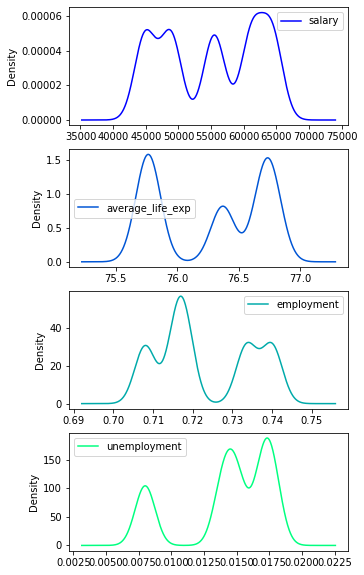

In [17]:
q=pd.read_sql_query('''
SELECT salary,average_life_exp,
       employment,unemployment
FROM macro;
''',con=connection)
fl=['salary','average_life_exp',
    'employment','unemployment']
q.plot(kind='kde',cmap=pl.cm.winter,
       subplots=True,sharex=False,
       figsize=(5,10))
pl.show()

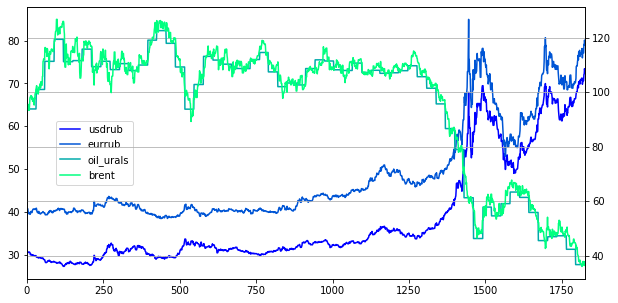

In [18]:
q=pd.read_sql_query('''
SELECT usdrub,eurrub,oil_urals,brent
FROM macro;
''',con=connection)
fl=['usdrub','eurrub','oil_urals','brent']
qp=q.plot(kind='line',figsize=(10,5),
       secondary_y=fl[2:],cmap=pl.cm.winter)
lines=qp.get_lines()+qp.right_ax.get_lines()
qp.legend(lines,[l.get_label() for l in lines],
          bbox_to_anchor=(.2,.6))
pl.grid(); pl.show()

# 📑 SQL & Pandas Comparing

,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC
Date,,,
2010,15.3671,11.6493,7.67671
2012,15.2541,11.4098,7.28142
2013,16.0822,12.2521,8.10685
2014,16.9808,12.9836,8.67123
2015,17.4301,13.2575,8.82192


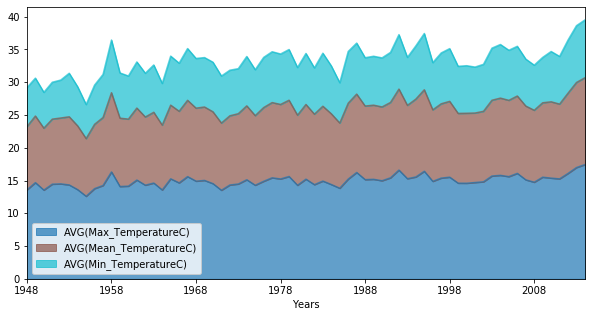

,AVG(Max_TemperatureC),AVG(Mean_TemperatureC),AVG(Min_TemperatureC)
Years,,,
2010,15.3671,11.6493,7.67671
2012,15.2541,11.4098,7.28142
2013,16.0822,12.2521,8.10685
2014,16.9808,12.9836,8.67123
2015,17.4301,13.2575,8.82192


In [19]:
display(weather\
        .groupby(weather['Date']\
                 .map(lambda x: x[-4:]))\
        .mean().tail().style\
        .set_table_styles(style_dict))
q=pd.read_sql_query('''
SELECT SUBSTR(Date,-4,4) AS Years,
       AVG(Max_TemperatureC),
       AVG(Mean_TemperatureC),
       AVG(Min_TemperatureC)
FROM weather
GROUP BY Years;
''',con=connection).set_index('Years')
q.plot(kind='area',figsize=(10,5),
       alpha=.7,cmap=pl.cm.tab10)
pl.show()
q.tail().style.set_table_styles(style_dict)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,112151,29627,18148,16745,4948,8550
125,76237,3473,7102,16538,778,918
284,68951,4411,12609,8692,751,2406
39,56159,555,902,10002,212,2916
258,56083,4563,2124,6422,730,3321
103,56082,3504,8906,18028,1480,2498
259,53205,4959,7336,3012,967,818


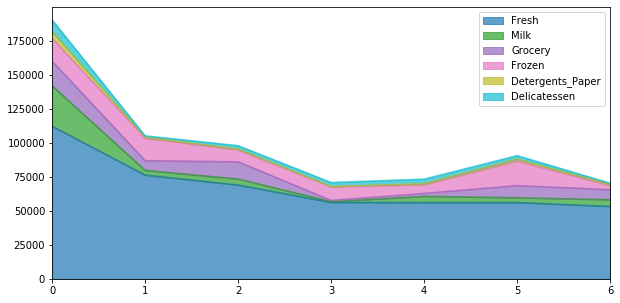

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,76237,3473,7102,16538,778,918
2,68951,4411,12609,8692,751,2406
3,56159,555,902,10002,212,2916
4,56083,4563,2124,6422,730,3321
5,56082,3504,8906,18028,1480,2498
6,53205,4959,7336,3012,967,818


In [20]:
fl=['Fresh','Milk','Grocery','Frozen',
    'Detergents_Paper','Delicatessen']
display(customers[fl].where(customers.Fresh>50000)\
        .dropna().sort_values('Fresh',ascending=False)\
        .astype('int64').style.set_table_styles(style_dict))
q=pd.read_sql_query('''
SELECT Fresh,Milk,Grocery,Frozen,
       Detergents_Paper,Delicatessen
FROM customers
WHERE Fresh>50000
ORDER BY Fresh DESC;
''',con=connection)
q.plot(kind='area',cmap=pl.cm.tab10,
       alpha=.7,figsize=(10,5))
pl.show()
q.style.set_table_styles(style_dict)

"index" INTEGER, "timestamp" TEXT, "full_sq" INTEGER, "floor" REAL, "max_floor" REAL, "num_room" REAL, "area_m" REAL, "kremlin_km" REAL, "big_road2_km" REAL, "big_road1_km" REAL, "workplaces_km" REAL, "stadium_km" REAL, "swim_pool_km" REAL, "fitness_km" REAL, "detention_facility_km" REAL, "cemetery_km" REAL, "radiation_km" REAL, "oil_chemistry_km" REAL, "theater_km" REAL, "exhibition_km" REAL, "museum_km" REAL, "park_km" REAL, "public_healthcare_km" REAL, "metro_min_walk" REAL, "metro_km_avto" REAL, "bus_terminal_avto_km" REAL, "public_transport_station_min_walk" REAL, "railroad_station_walk_min" REAL, "railroad_station_avto_km" REAL, "kindergarten_km" REAL, "school_km" REAL, "preschool_km" REAL, "university_km" REAL, "additional_education_km" REAL, "shopping_centers_km" REAL, "big_market_km" REAL, "ekder_all" INTEGER, "work_all" INTEGER, "young_all" INTEGER, "sub_area" TEXT, "ID_metro" INTEGER, "office_raion" INTEGER, "raion_popul" INTEGER, "healthcare_centers_raion" INTEGER, "school_education_centers_raion" INTEGER, "sport_objects_raion" INTEGER, "preschool_education_centers_raion" INTEGER )

,workplaces_km,public_transport_station_min_walk,school_km,public_healthcare_km
ID_metro,,,,
219,2.81226,2.60405,0.610079,0.851405
220,1.3011,1.65942,0.385652,1.36823
221,0.287218,3.95788,0.273374,1.36559
222,2.33879,0.522029,0.243305,3.18113
223,1.66627,1.18906,0.32668,1.04844


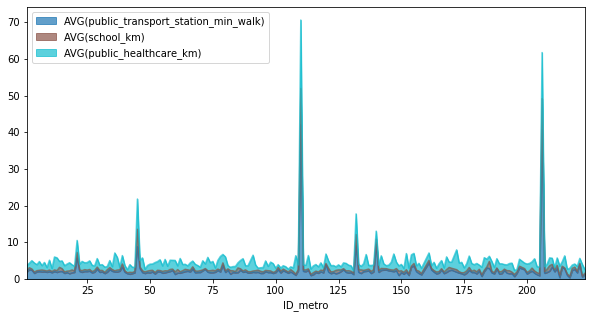

,AVG(workplaces_km),AVG(public_transport_station_min_walk),AVG(school_km),AVG(public_healthcare_km)
ID_metro,,,,
219,2.81226,2.60405,0.610079,0.851405
220,1.3011,1.65942,0.385652,1.36823
221,0.287218,3.95788,0.273374,1.36559
222,2.33879,0.522029,0.243305,3.18113
223,1.66627,1.18906,0.32668,1.04844


In [21]:
fl=['workplaces_km','public_transport_station_min_walk',
    'school_km','public_healthcare_km']
display(housing[fl]\
        .groupby(housing['ID_metro'])\
        .mean().tail().style\
        .set_table_styles(style_dict))
q=pd.read_sql_query('''
SELECT ID_metro,
       AVG(workplaces_km),
       AVG(public_transport_station_min_walk),
       AVG(school_km),
       AVG(public_healthcare_km)
FROM housing
GROUP BY ID_metro;
''',con=connection).set_index('ID_metro')
q.iloc[:,int(1):].plot(kind='area',figsize=(10,5),
       alpha=.7,cmap=pl.cm.tab10)
pl.show()
q.tail().style.set_table_styles(style_dict)

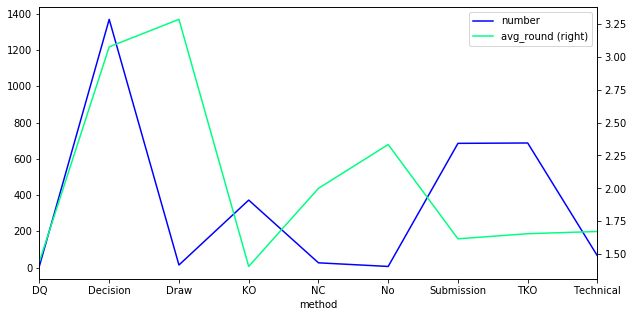

,number,avg_round
method,,
NC,26,2
No,6,2.33333
Submission,685,1.61606
TKO,687,1.65502
Technical,64,1.67188


In [22]:
q=pd.read_sql_query('''
SELECT method,
       COUNT(*) AS number,
       AVG(round) AS avg_round
FROM mma
GROUP BY method;
''',con=connection).set_index('method')
q.plot(secondary_y='avg_round',
       figsize=(10,5),cmap=pl.cm.winter)
pl.show()
q.tail().style.set_table_styles(style_dict)

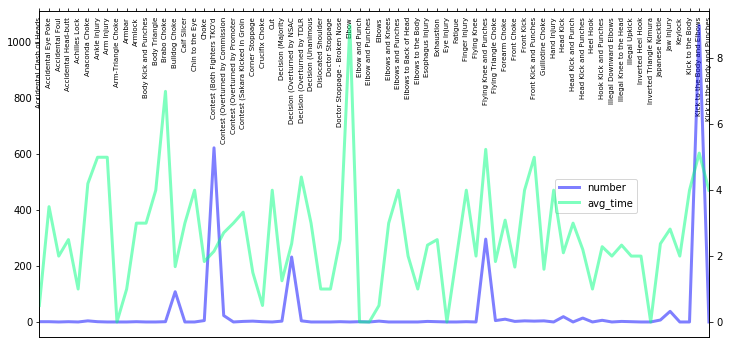

,method_d,number,avg_time
155,Toe Hold,1,0
156,Triangle Armbar,8,2.375
157,Triangle Choke,39,2.82051
158,Triangle Kimura,1,2
159,Twister,1,4
160,Unanimous,1060,5.12642
161,Wheel Kick and Punches,1,4


In [27]:
q=pd.read_sql_query('''
SELECT method_d,
       COUNT(*) AS number,
       AVG(time) AS avg_time
FROM mma
GROUP BY method_d;
''',con=connection)
n,m=int(70),int(7)
pl.rcParams['xtick.major.pad']='-10'
pl.rcParams['xtick.bottom']=\
pl.rcParams['xtick.labelbottom']=False
pl.rcParams['xtick.top']=\
pl.rcParams['xtick.labeltop']=True
qp=q.tail(n).plot(secondary_y='avg_time',
                  figsize=(12,6),alpha=.5,
                  lw=3,cmap=pl.cm.winter)
qp.set_xticks(q.tail(n).index)
qp.set_xticklabels(q.method_d[:n],va='top',
                   fontsize=7,rotation=90)
lines=qp.get_lines()+qp.right_ax.get_lines()
qp.legend(lines,[l.get_label() for l in lines],
          bbox_to_anchor=(.9,.5))
pl.show()
q.tail(m).style.set_table_styles(style_dict)

# 📑 Close the Connection and Delete This Database

In [24]:
#if connection is not None:
#    connection.close()
#if os.path.exists('example.db'):
#    os.remove('example.db')
#else:
#    print('The file does not exist')
os.listdir()

['.config', 'example.db', 'sample_data']